# Web Scraping - Worldometers - Barometro Mundial

1. Link [Dados de populacao mundial por paises](https://www.worldometers.info/world-population/population-by-country/)
2. Link [Dados de relacao paises, regioes e continentes](https://www.worldometers.info/population/world/)


<h2> Conteudo </h2>

I. <b> Bibliotecas</b><br>
a) [Importacao de Bibliotecas](#bib)<br>

II. <b> Scraping </b><br>
a) [URL de paises para dataframe dados de Paises - (df\_paises)](#scrape_pais)<br>
b) [URL de contendo informacao de Paises, Regioes e Continentes: para dataframe - (df\_paises_reg_cont)](#scrape_reg)<br>
c) [Uniao das Dataframe - (df)](#uniao)<br><br>

III. <b> Limpeza de Dados </b><br>
a) [Conversao de dados - textos para numericos (inteiro e decimal)](#limpeza)<br><br>

IV.<b> Analise de dados </b><br>
a) [Parametros estatistico](#stats)<br>
b) [Dinamica mundial da populacao](#populacao)<br>
c) [CPLP](#cplp)<br>

# Bibliotecas
<a id='#bib'> </a>
       
### Importar as bibliotecas relevantes

In [1]:
# para analise de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# para web scraping
import requests
from bs4 import BeautifulSoup

In [2]:
# Funcao para agilizar o web scraping
# Estamos a criar esta funcao porque preciseremos dessa operacao muitas vezes
def parse(url):
    return BeautifulSoup(requests.get(url).text, 'html.parser')

# Scrappring

### Pagina de Paises
<a id="scrape_pais"></a>
1. Link de [Dados de populacao mundial por paises para Extrair web scraping](https://www.worldometers.info/world-population/population-by-country/)


In [3]:
URL_PAISES = "https://www.worldometers.info/world-population/population-by-country/"

In [4]:
sopa =  parse(URL_PAISES)

##### Mineracao de dados

In [5]:
# Extrair o cabecalho da tabela
nomes = []

for nome in sopa.find('thead').find_all('th')[1:]:
    print(nome.text)
    nomes.append(nome.text)

Country (or dependency)
Population (2020)
Yearly Change
Net Change
Density (P/Km²)
Land Area (Km²)
Migrants (net)
Fert. Rate
Med. Age
Urban Pop %
World Share


In [6]:
# extrair valores da tabela
dados = [] # data point, observation, observacao, dados 

for pais in sopa.find('tbody').find_all('tr'):
    dados.append([dado.text for dado in pais.find_all('td')[1:]])

In [7]:
dados

[['China',
  '1,439,323,776',
  '0.39 %',
  '5,540,090',
  '153',
  '9,388,211',
  '-348,399',
  '1.7',
  '38',
  '61 %',
  '18.47 %'],
 ['India',
  '1,380,004,385',
  '0.99 %',
  '13,586,631',
  '464',
  '2,973,190',
  '-532,687',
  '2.2',
  '28',
  '35 %',
  '17.70 %'],
 ['United States',
  '331,002,651',
  '0.59 %',
  '1,937,734',
  '36',
  '9,147,420',
  '954,806',
  '1.8',
  '38',
  '83 %',
  '4.25 %'],
 ['Indonesia',
  '273,523,615',
  '1.07 %',
  '2,898,047',
  '151',
  '1,811,570',
  '-98,955',
  '2.3',
  '30',
  '56 %',
  '3.51 %'],
 ['Pakistan',
  '220,892,340',
  '2.00 %',
  '4,327,022',
  '287',
  '770,880',
  '-233,379',
  '3.6',
  '23',
  '35 %',
  '2.83 %'],
 ['Brazil',
  '212,559,417',
  '0.72 %',
  '1,509,890',
  '25',
  '8,358,140',
  '21,200',
  '1.7',
  '33',
  '88 %',
  '2.73 %'],
 ['Nigeria',
  '206,139,589',
  '2.58 %',
  '5,175,990',
  '226',
  '910,770',
  '-60,000',
  '5.4',
  '18',
  '52 %',
  '2.64 %'],
 ['Bangladesh',
  '164,689,383',
  '1.01 %',
  '1,643,2

######  Tabela retangular

In [8]:
df_paises = pd.DataFrame(dados, columns=nomes)

In [9]:
df_paises

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [10]:
df_paises.columns =  [
                        'paises', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)',
                        'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'
                     ]

### Pagina de Paises, Continentes e Regioes
<a id="crape_reg"></a>


2. Link de [Dados de relacao paises, regioes e continentes web scraping](https://www.worldometers.info/population/world/)


In [11]:
# url base das populacoes mundiais
URL_POPULACAO = "https://www.worldometers.info"

In [12]:
# url dos dos continentes listados
URL_CONTINENTE = "https://www.worldometers.info/population/world/"

In [13]:
#  solicitar e tranformar a dados recibos da platforma WORLOMETERS
sopa_continente = parse(URL_CONTINENTE)

In [14]:
# criar um dicionario para guardar dados nomes dos continentes e seus urls
lista_continente_url = {}

for continent in sopa_continente.find_all('h4'):
    url_region = URL_POPULACAO + continent.find('a')['href']
    lista_continente_url[continent.text] = url_region

In [15]:
lista_continente_url

{'Asia': 'https://www.worldometers.info/population/asia/',
 'Africa': 'https://www.worldometers.info/population/africa/',
 'Europe': 'https://www.worldometers.info/population/europe/',
 'Latin America and the Caribbean': 'https://www.worldometers.info/population/latin-america-and-the-caribbean/',
 'Northern America': 'https://www.worldometers.info/population/northern-america/',
 'Oceania': 'https://www.worldometers.info/population/oceania/'}

In [16]:
print(lista_continente_url['Asia'])

https://www.worldometers.info/population/asia/


#### Definir funcao para auxiliar na extracao de dados (paises, regioes e continentes)

In [17]:
def func_regioes(sopa):
    regiao = []
    for reg in sopa.find_all('h4'):
        try:
            regiao.append(reg.find('a').text)
        except:
            pass
    return regiao

    #return [reg.find('a').text for reg in sopa.find_all('h4')]


def func_nomes_pais_reg_cont(sopa, continente):
    
    regioes = func_regioes(sopa)
    
    paises_regioes_cont = []
    
    aux_reg = ' '
    
    for regs in sopa.find_all('div', {'class':'noli'}):
        for reg in regs.find_all('li'):
            
            pais = reg.find('a').text
            
            pais_url = URL_POPULACAO + reg.find('a')['href']
            
            if pais in regioes:
                aux_reg = pais
                
            else:
                paises_regioes_cont.append([continente, aux_reg, pais, pais_url])
    
    return pd.DataFrame(paises_regioes_cont, columns=['continentes', 'regioes', 'paises', 'url'])
            

#### Capturar todos os Paises, Regioes e Continente

In [18]:
paises_reg_cont = pd.DataFrame(columns=['continentes', 'regioes', 'paises', 'url'])

for cont in list(lista_continente_url.keys()):
    
    
    sopa = parse(lista_continente_url[cont])
    
    df = func_nomes_pais_reg_cont(sopa, cont)
    
    paises_reg_cont = pd.concat([paises_reg_cont, df], ignore_index=True)
    

In [19]:
paises_reg_cont

,continentes,regioes,paises,url
0,Asia,Southern Asia,India,https://www.worldometers.info/world-population...
1,Asia,Southern Asia,Pakistan,https://www.worldometers.info/world-population...
2,Asia,Southern Asia,Bangladesh,https://www.worldometers.info/world-population...
3,Asia,Southern Asia,Iran,https://www.worldometers.info/world-population...
4,Asia,Southern Asia,Afghanistan,https://www.worldometers.info/world-population...
...,...,...,...,...
229,Oceania,Micronesia,Kiribati,https://www.worldometers.info/world-population...
230,Oceania,Micronesia,Northern Mariana Islands,https://www.worldometers.info/world-population...
231,Oceania,Micronesia,Marshall Islands,https://www.worldometers.info/world-population...
232,Oceania,Micronesia,Palau,https://www.worldometers.info/world-population...


In [20]:
print(paises_reg_cont.url[1])

https://www.worldometers.info/world-population/pakistan-population/


In [21]:
print('Nome da variaveis dataframe Dados Paises\n___\n',df_paises.columns.values, '\n\n')

print('Nome da variaveis dataframe Dados Paises Regiao e Continente\n___\n',paises_reg_cont.columns.values)

Nome da variaveis dataframe Dados Paises
___
 ['paises' 'Population (2020)' 'Yearly Change' 'Net Change'
 'Density (P/Km²)' 'Land Area (Km²)' 'Migrants (net)' 'Fert. Rate'
 'Med. Age' 'Urban Pop %' 'World Share'] 


Nome da variaveis dataframe Dados Paises Regiao e Continente
___
 ['continentes' 'regioes' 'paises' 'url']


In [22]:
paises_reg_cont[paises_reg_cont.paises.str.contains('U.S')]

,continentes,regioes,paises,url
207,Northern America,Northern America,U.S.A.,https://www.worldometers.info/world-population...


In [23]:
paises_reg_cont.loc[207, 'paises'] = "United States"
paises_reg_cont.loc[108, 'paises'] = "Sao Tome & Principe"

df_paises

,paises,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


## Uniao de dataframes
<a id="uniao"></a>

In [24]:
df_paises

,paises,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [25]:
paises_reg_cont

,continentes,regioes,paises,url
0,Asia,Southern Asia,India,https://www.worldometers.info/world-population...
1,Asia,Southern Asia,Pakistan,https://www.worldometers.info/world-population...
2,Asia,Southern Asia,Bangladesh,https://www.worldometers.info/world-population...
3,Asia,Southern Asia,Iran,https://www.worldometers.info/world-population...
4,Asia,Southern Asia,Afghanistan,https://www.worldometers.info/world-population...
...,...,...,...,...
229,Oceania,Micronesia,Kiribati,https://www.worldometers.info/world-population...
230,Oceania,Micronesia,Northern Mariana Islands,https://www.worldometers.info/world-population...
231,Oceania,Micronesia,Marshall Islands,https://www.worldometers.info/world-population...
232,Oceania,Micronesia,Palau,https://www.worldometers.info/world-population...


In [26]:
frames = [paises_reg_cont, df_paises]

df_final = pd.merge(paises_reg_cont, df_paises, on = 'paises')

In [27]:
df_final

,continentes,regioes,paises,url,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Asia,Southern Asia,India,https://www.worldometers.info/world-population...,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
1,Asia,Southern Asia,Pakistan,https://www.worldometers.info/world-population...,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
2,Asia,Southern Asia,Bangladesh,https://www.worldometers.info/world-population...,"164,689,383",1.01 %,"1,643,222","1,265","130,170","-369,501",2.1,28,39 %,2.11 %
3,Asia,Southern Asia,Iran,https://www.worldometers.info/world-population...,"83,992,949",1.30 %,"1,079,043",52,"1,628,550","-55,000",2.2,32,76 %,1.08 %
4,Asia,Southern Asia,Afghanistan,https://www.worldometers.info/world-population...,"38,928,346",2.33 %,"886,592",60,"652,860","-62,920",4.6,18,25 %,0.50 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Oceania,Micronesia,Kiribati,https://www.worldometers.info/world-population...,"119,449",1.57 %,"1,843",147,810,-800,3.6,23,57 %,0.00 %
219,Oceania,Micronesia,Northern Mariana Islands,https://www.worldometers.info/world-population...,"57,559",0.60 %,343,125,460,,N.A.,N.A.,88 %,0.00 %
220,Oceania,Micronesia,Marshall Islands,https://www.worldometers.info/world-population...,"59,190",0.68 %,399,329,180,,N.A.,N.A.,70 %,0.00 %
221,Oceania,Micronesia,Palau,https://www.worldometers.info/world-population...,"18,094",0.48 %,86,39,460,,N.A.,N.A.,N.A.,0.00 %


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   continentes        223 non-null    object
 1   regioes            223 non-null    object
 2   paises             223 non-null    object
 3   url                223 non-null    object
 4   Population (2020)  223 non-null    object
 5   Yearly Change      223 non-null    object
 6   Net Change         223 non-null    object
 7   Density (P/Km²)    223 non-null    object
 8   Land Area (Km²)    223 non-null    object
 9   Migrants (net)     223 non-null    object
 10  Fert. Rate         223 non-null    object
 11  Med. Age           223 non-null    object
 12  Urban Pop %        223 non-null    object
 13  World Share        223 non-null    object
dtypes: object(14)
memory usage: 26.1+ KB


## Limpeza
<a id="limpeza"></a>

In [29]:
df_final

,continentes,regioes,paises,url,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Asia,Southern Asia,India,https://www.worldometers.info/world-population...,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
1,Asia,Southern Asia,Pakistan,https://www.worldometers.info/world-population...,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
2,Asia,Southern Asia,Bangladesh,https://www.worldometers.info/world-population...,"164,689,383",1.01 %,"1,643,222","1,265","130,170","-369,501",2.1,28,39 %,2.11 %
3,Asia,Southern Asia,Iran,https://www.worldometers.info/world-population...,"83,992,949",1.30 %,"1,079,043",52,"1,628,550","-55,000",2.2,32,76 %,1.08 %
4,Asia,Southern Asia,Afghanistan,https://www.worldometers.info/world-population...,"38,928,346",2.33 %,"886,592",60,"652,860","-62,920",4.6,18,25 %,0.50 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Oceania,Micronesia,Kiribati,https://www.worldometers.info/world-population...,"119,449",1.57 %,"1,843",147,810,-800,3.6,23,57 %,0.00 %
219,Oceania,Micronesia,Northern Mariana Islands,https://www.worldometers.info/world-population...,"57,559",0.60 %,343,125,460,,N.A.,N.A.,88 %,0.00 %
220,Oceania,Micronesia,Marshall Islands,https://www.worldometers.info/world-population...,"59,190",0.68 %,399,329,180,,N.A.,N.A.,70 %,0.00 %
221,Oceania,Micronesia,Palau,https://www.worldometers.info/world-population...,"18,094",0.48 %,86,39,460,,N.A.,N.A.,N.A.,0.00 %


In [30]:
def get_number(string):
    resulado = "".join([digito for digito in string if digito.isnumeric() or digito in '.-'])
    
    if resulado.replace('.','').replace('-','').isnumeric():
        return float(resulado)
    else:
        return np.nan

In [31]:
# eliminar as virgulas, os espacos e letras nas variaveis supostamente numericas.
df = df_final[[
            'Population (2020)','Yearly Change', 'Net Change', 'Density (P/Km²)', 
            'Land Area (Km²)','Migrants (net)', 'Fert. Rate', 'Med. Age', 
            'Urban Pop %','World Share'
        ]].apply([get_number])


df.columns = [
            'Population (2020)','Yearly Change', 'Net Change', 'Density (P/Km²)', 
            'Land Area (Km²)','Migrants (net)', 'Fert. Rate', 'Med. Age', 
            'Urban Pop %','World Share'
        ]


# adicionr as variaveis - 'continentes', 'regioes', 'paises', 'url'
df[['continentes', 'regioes', 'paises', 'url']] = df_final[['continentes', 'regioes', 'paises', 'url']]


# reordenar as variaveis
df = df[[
                'paises', 'regioes', 'continentes', 'url', 'Population (2020)', 'Yearly Change', 'Net Change', 
                'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age',
                'Urban Pop %', 'World Share'
            ]]


# converter as variaveis de df.columns[4:] em float
df.iloc[:,4:] = df.iloc[:,4:].astype(float)

df

,paises,regioes,continentes,url,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,India,Southern Asia,Asia,https://www.worldometers.info/world-population...,1.380004e+09,0.99,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
1,Pakistan,Southern Asia,Asia,https://www.worldometers.info/world-population...,2.208923e+08,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
2,Bangladesh,Southern Asia,Asia,https://www.worldometers.info/world-population...,1.646894e+08,1.01,1643222.0,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11
3,Iran,Southern Asia,Asia,https://www.worldometers.info/world-population...,8.399295e+07,1.30,1079043.0,52.0,1628550.0,-55000.0,2.2,32.0,76.0,1.08
4,Afghanistan,Southern Asia,Asia,https://www.worldometers.info/world-population...,3.892835e+07,2.33,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Kiribati,Micronesia,Oceania,https://www.worldometers.info/world-population...,1.194490e+05,1.57,1843.0,147.0,810.0,-800.0,3.6,23.0,57.0,0.00
219,Northern Mariana Islands,Micronesia,Oceania,https://www.worldometers.info/world-population...,5.755900e+04,0.60,343.0,125.0,460.0,NaN,NaN,NaN,88.0,0.00
220,Marshall Islands,Micronesia,Oceania,https://www.worldometers.info/world-population...,5.919000e+04,0.68,399.0,329.0,180.0,NaN,NaN,NaN,70.0,0.00
221,Palau,Micronesia,Oceania,https://www.worldometers.info/world-population...,1.809400e+04,0.48,86.0,39.0,460.0,NaN,NaN,NaN,NaN,0.00


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   paises             223 non-null    object 
 1   regioes            223 non-null    object 
 2   continentes        223 non-null    object 
 3   url                223 non-null    object 
 4   Population (2020)  223 non-null    float64
 5   Yearly Change      223 non-null    float64
 6   Net Change         223 non-null    float64
 7   Density (P/Km²)    223 non-null    float64
 8   Land Area (Km²)    223 non-null    float64
 9   Migrants (net)     194 non-null    float64
 10  Fert. Rate         194 non-null    float64
 11  Med. Age           194 non-null    float64
 12  Urban Pop %        210 non-null    float64
 13  World Share        223 non-null    float64
dtypes: float64(10), object(4)
memory usage: 26.1+ KB


In [33]:
df.isna().sum()

paises                0
regioes               0
continentes           0
url                   0
Population (2020)     0
Yearly Change         0
Net Change            0
Density (P/Km²)       0
Land Area (Km²)       0
Migrants (net)       29
Fert. Rate           29
Med. Age             29
Urban Pop %          13
World Share           0
dtype: int64

In [34]:
df.columns

Index(['paises', 'regioes', 'continentes', 'url', 'Population (2020)',
       'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)',
       'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %',
       'World Share'],
      dtype='object')

In [35]:
df.sort_values(['Population (2020)'], ascending=False)

,paises,regioes,continentes,url,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
9,China,Eastern Asia,Asia,https://www.worldometers.info/world-population...,1.439324e+09,0.39,5540090.0,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
0,India,Southern Asia,Asia,https://www.worldometers.info/world-population...,1.380004e+09,0.99,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
198,United States,Northern America,Northern America,https://www.worldometers.info/world-population...,3.310027e+08,0.59,1937734.0,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
17,Indonesia,South-Eastern Asia,Asia,https://www.worldometers.infohttp://www.worldo...,2.735236e+08,1.07,2898047.0,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
1,Pakistan,Southern Asia,Asia,https://www.worldometers.info/world-population...,2.208923e+08,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Montserrat,Caribbean,Latin America and the Caribbean,https://www.worldometers.info/world-population...,4.992000e+03,0.06,3.0,50.0,100.0,NaN,NaN,NaN,10.0,0.00
166,Falkland Islands,South America,Latin America and the Caribbean,https://www.worldometers.info/world-population...,3.480000e+03,3.05,103.0,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
215,Niue,Polynesia,Oceania,https://www.worldometers.info/world-population...,1.626000e+03,0.68,11.0,6.0,260.0,NaN,NaN,NaN,46.0,0.00
216,Tokelau,Polynesia,Oceania,https://www.worldometers.info/world-population...,1.357000e+03,1.27,17.0,136.0,10.0,NaN,NaN,NaN,0.0,0.00


# Analise
- Rapida analise estatistica
- Populacao mundial - verificaco de dinamica
- CPLP

In [36]:
df

,paises,regioes,continentes,url,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,India,Southern Asia,Asia,https://www.worldometers.info/world-population...,1.380004e+09,0.99,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
1,Pakistan,Southern Asia,Asia,https://www.worldometers.info/world-population...,2.208923e+08,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
2,Bangladesh,Southern Asia,Asia,https://www.worldometers.info/world-population...,1.646894e+08,1.01,1643222.0,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11
3,Iran,Southern Asia,Asia,https://www.worldometers.info/world-population...,8.399295e+07,1.30,1079043.0,52.0,1628550.0,-55000.0,2.2,32.0,76.0,1.08
4,Afghanistan,Southern Asia,Asia,https://www.worldometers.info/world-population...,3.892835e+07,2.33,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Kiribati,Micronesia,Oceania,https://www.worldometers.info/world-population...,1.194490e+05,1.57,1843.0,147.0,810.0,-800.0,3.6,23.0,57.0,0.00
219,Northern Mariana Islands,Micronesia,Oceania,https://www.worldometers.info/world-population...,5.755900e+04,0.60,343.0,125.0,460.0,NaN,NaN,NaN,88.0,0.00
220,Marshall Islands,Micronesia,Oceania,https://www.worldometers.info/world-population...,5.919000e+04,0.68,399.0,329.0,180.0,NaN,NaN,NaN,70.0,0.00
221,Palau,Micronesia,Oceania,https://www.worldometers.info/world-population...,1.809400e+04,0.48,86.0,39.0,460.0,NaN,NaN,NaN,NaN,0.00


In [37]:
# indexar a variavel paises

df.set_index('paises', inplace=True)

#salvar os dados
df.to_csv('Population (2020).csv')

### Rapido Analise estatistica
<a id='#stats'> </a>

In [38]:
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.230000e+02,223.000000,2.230000e+02,223.000000,2.230000e+02,194.000000,194.000000,194.000000,210.000000,223.000000
mean,3.449543e+07,1.133318,3.521152e+05,492.869955,5.727546e+05,-180.438144,2.690206,30.613402,59.657143,0.442466
std,1.384989e+08,1.065304,1.144308e+06,2392.073588,1.724628e+06,125484.499203,1.258116,9.112994,23.449969,1.776843
min,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,5.919855e+05,0.350000,5.040000e+02,35.000000,5.575000e+03,-11139.750000,1.700000,22.000000,43.000000,0.010000
50%,5.850342e+06,1.000000,4.637500e+04,95.000000,8.746000e+04,-1000.000000,2.300000,30.000000,61.500000,0.080000
75%,2.261501e+07,1.860000,2.830390e+05,239.500000,4.179250e+05,9488.250000,3.600000,39.000000,79.000000,0.290000
max,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


### Populacao
<a id = 'populacao'></a>



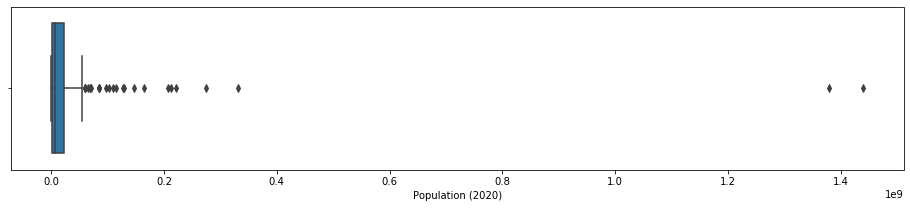

In [39]:
plt.figure(figsize=(16,3))
sns.boxplot(df['Population (2020)'], orient='h')

### CPLP - Comunidade de Paises de Lingua Portuguesa
<a id='#cplp'> </a>

#### Dimensao territorial vs Russia (maior pais em area)

In [40]:
def area_comparada_russia(pais):
    
    area_russ = df.loc['Russia']['Land Area (Km²)']
    
    area_pais =  df.loc[pais]['Land Area (Km²)']
    
    for i in range(int(area_russ)):
        if area_pais * i > area_russ:
            n_vezes = i - 1
            break
    
    print(f"{'Area ' +  pais.upper():<25}  {n_vezes}  \t vezes \t de Russia".expandtabs(20))

In [41]:
cplp_paises = [
                'Angola', 'Sao Tome & Principe', 'Cabo Verde', 'Mozambique', 
                'Guinea-Bissau', 'Portugal', 'Brazil'
            ]



In [42]:
for p_cplp in cplp_paises:
    area_comparada_russia(p_cplp)

Area ANGOLA                13            vezes               de Russia
Area SAO TOME & PRINCIPE   17059         vezes               de Russia
Area CABO VERDE            4063          vezes               de Russia
Area MOZAMBIQUE            20            vezes               de Russia
Area GUINEA-BISSAU         582           vezes               de Russia
Area PORTUGAL              178           vezes               de Russia
Area BRAZIL                1             vezes               de Russia


In [43]:
def area_comparada_russia(pais):
    
    area_russ = df.loc['Russia']['Land Area (Km²)']
    
    area_pais =  df.loc[pais]['Land Area (Km²)']
    
    n_vezes = int(np.round(1 / (area_pais / area_russ)))
    
    print(f"{'Area ' +  pais.upper():<30} aprox.   {n_vezes}  \t vezes de Russia".expandtabs(10))

In [44]:
for p_cplp in cplp_paises:
    area_comparada_russia(p_cplp)

Area ANGOLA                    aprox.   13         vezes de Russia
Area SAO TOME & PRINCIPE       aprox.   17059      vezes de Russia
Area CABO VERDE                aprox.   4064       vezes de Russia
Area MOZAMBIQUE                aprox.   21         vezes de Russia
Area GUINEA-BISSAU             aprox.   582        vezes de Russia
Area PORTUGAL                  aprox.   179        vezes de Russia
Area BRAZIL                    aprox.   2          vezes de Russia


#### Dimensao populacional cplp vs china (mais populoso)

In [46]:
def pop_comparada_china(pais):
    
    area_russ = df.loc['China']['Population (2020)']
    
    area_pais =  df.loc[pais]['Population (2020)']
    
    n_vezes = int(np.round(1 / (area_pais / area_russ)))
    
    print(f"{'Populacao de ' +  pais.upper():<30} aprox.   {n_vezes}  \t vezes de China".expandtabs(10))

In [54]:
df.loc[cplp_paises]['Population (2020)'].sum() / df.loc['China']['Population (2020)']

0.2012201735490542

C:\Users\lmanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


TypeError: object of type 'numpy.float64' has no len()

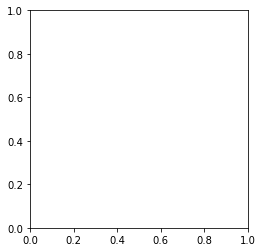

In [55]:
plt.pie(df.loc[cplp_paises]['Population (2020)'].sum(), df.loc['China']['Population (2020)'])

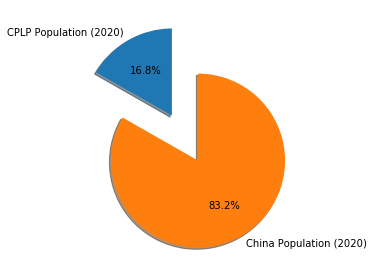

In [74]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'CPLP Population (2020)', 'China Population (2020)'

explode = (0, 0.6)  # only "explode" the 2nd slice (i.e. 'Hogs')





sizes = df.loc[cplp_paises]['Population (2020)'].sum(), df.loc['China']['Population (2020)']

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);

In [49]:
for p_cplp in cplp_paises:
    pop_comparada_china(p_cplp)

Populacao de ANGOLA            aprox.   44         vezes de China
Populacao de SAO TOME & PRINCIPE aprox.   6567     vezes de China
Populacao de CABO VERDE        aprox.   2589       vezes de China
Populacao de MOZAMBIQUE        aprox.   46         vezes de China
Populacao de GUINEA-BISSAU     aprox.   731        vezes de China
Populacao de PORTUGAL          aprox.   141        vezes de China
Populacao de BRAZIL            aprox.   7          vezes de China


In [50]:
df.loc['Guinea-Bissau']['Population (2020)']

1968001.0

https://en.wikipedia.org/wiki/List_of_official_languages_by_country_and_territory

In [56]:
language_url = "https://en.wikipedia.org/wiki/List_of_official_languages_by_country_and_territory"

In [58]:
page = BeautifulSoup(requests.get(language_url).text, 'html.parser')

In [65]:
for title in page.find('table').find_all('tr'):
    print(title.find('span').text)

 Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources: "List of official languages by country and territory" – news · newspapers · books · scholar · JSTOR


In [68]:
for title in page.find('tbody').find_all('tr'):
    print(title.find('td'))

<td class="mbox-image"><div style="width:52px"><a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></div></td>
